In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

## Introduction
Over 1,200 bull riders from around the world are members of Professional Bull Riders (PBR) and compete in the more than 300 PBR affiliated bull riding events per year. This data set includes information about the top 50 ranked bull riders for the 2013, according to the PBR standings reported in July of 2013. Rankings are based on a system which awards points for qualified rides at events throughout the season.

### Primary Research Question

The average American adult man weighs 190 pounds.  Do professional bull riders from the US weigh the same?

In [1]:
bull <- read.csv("D:/Data/BullRiders.csv")

In [2]:
str(bull)

'data.frame':	58 obs. of  44 variables:
 $ Rider             : Factor w/ 58 levels "Austin Meier",..: 26 39 23 30 41 58 21 50 43 24 ...
 $ Rank15            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country           : Factor w/ 4 levels "AUS","BRA","CAN",..: 2 4 4 2 4 2 2 2 4 4 ...
 $ YearBorn          : int  1984 1991 1987 1994 1990 1979 1982 1987 1989 1986 ...
 $ Height            : int  66 67 70 68 73 72 70 67 68 70 ...
 $ Weight            : int  163 160 140 145 160 170 180 150 135 160 ...
 $ YearsPro          : int  3 4 10 2 6 9 16 7 9 10 ...
 $ Events14          : int  28 28 22 1 15 28 28 28 12 14 ...
 $ BuckOuts14        : int  93 86 63 1 41 81 90 92 30 37 ...
 $ Rides14           : int  41 33 25 0 17 29 41 50 8 16 ...
 $ CupPoints14       : num  9520 7494 4974 1672 3240 ...
 $ Rank14            : int  2 3 4 0 31 17 8 1 54 9 ...
 $ RidePer14         : num  0.441 0.384 0.397 0 0.415 ...
 $ RidesPer_45bull_14: num  0 0.2 0.5 0 0 ...
 $ Rides90pts_14     : int  5 2 4 0 0 1 2 1 0 2 ...
 $

In [3]:
head(bull,5)

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,CupPoints14,Rank14,RidePer14,RidesPer_45bull_14,Rides90pts_14,Wins14,Top5_14,Top10_14,FinalPoints14,Earnings14,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,9520.25,2,0.4409,0,5,2,10,14,1152.75,328121,22,72,35,8748.73,3,0.4861,0.375,4,3,5,9,1990.75,466585.1,0,0,0,0,0,0,0,0,0,0,0
2,Matt Triplett,2,USA,1991,67,160,4,28,86,33,7493.58,3,0.3837,0.2,2,0,4,11,2743.25,258025.8,9,26,11,2827.43,26,0.4231,1,1,0,1,2,1257.25,89377.51,0,0,0,0,0,0,0,0,0,0,0
3,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,4973.5,4,0.3968,0.5,4,2,5,5,4553.5,497598,26,90,47,10399.25,1,0.5222,0.2667,8,5,11,14,5296.25,1810711,26,82,40,9273.25,8,0.49,3,8,13,287,313340.3
4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,1671.87,0,0,0,0,0,0,0,0,32977.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,3240.25,31,0.4146,0,0,1,1,3,83.5,77426.3,24,66,22,4304.41,25,0.3333,0,0,0,2,2,0,58577.22,0,0,0,0,0,0,0,0,0,0,0


### Check the Variables of Interest

Let's find the variables we need to answer the question.

Which variable tells us how much the rider weighs? The variable name in the dataset is:

What type of variable is this? Categorical, Nominal, Quantitative

### Reflect on the Method 

Which method should we be using for this analysis and why? We will use a one-sample t-test to help us answer this lab question. Why?

We want to test a hypothesis that professional bull riders weigh 190 pounds on average. What will the null hypothesis look like for this one-sample t-test?

In [8]:
summary(bull)

            Rider        Rank15       Country     YearBorn        Height     
 Austin Meier  : 1   Min.   :  1.00   AUS: 5   Min.   :1979   Min.   :60.00  
 Ben Jones     : 1   1st Qu.: 15.25   BRA:13   1st Qu.:1985   1st Qu.:67.00  
 Billy Robinson: 1   Median : 32.50   CAN: 3   Median :1987   Median :68.00  
 Bonner Bolton : 1   Mean   : 51.31   USA:37   Mean   :1987   Mean   :68.64  
 Brady Sims    : 1   3rd Qu.: 61.00            3rd Qu.:1990   3rd Qu.:70.00  
 Brant Atwood  : 1   Max.   :279.00            Max.   :1994   Max.   :76.00  
 (Other)       :52                                                           
     Weight         YearsPro         Events14       BuckOuts14   
 Min.   :115.0   Min.   : 1.000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:145.0   1st Qu.: 5.000   1st Qu.: 4.00   1st Qu.: 9.25  
 Median :155.0   Median : 7.500   Median :17.50   Median :44.50  
 Mean   :153.8   Mean   : 7.948   Mean   :15.33   Mean   :43.03  
 3rd Qu.:162.8   3rd Qu.:10.000   3rd Qu.:25.0

In [4]:
#Select bull riders from the US
USA <-bull[bull$Country=="USA",]

In [5]:
# Summarize the bull rider weights
mean(USA$Weight)
sd(USA$Weight)

[1] 153.1081

[1] 13.02302

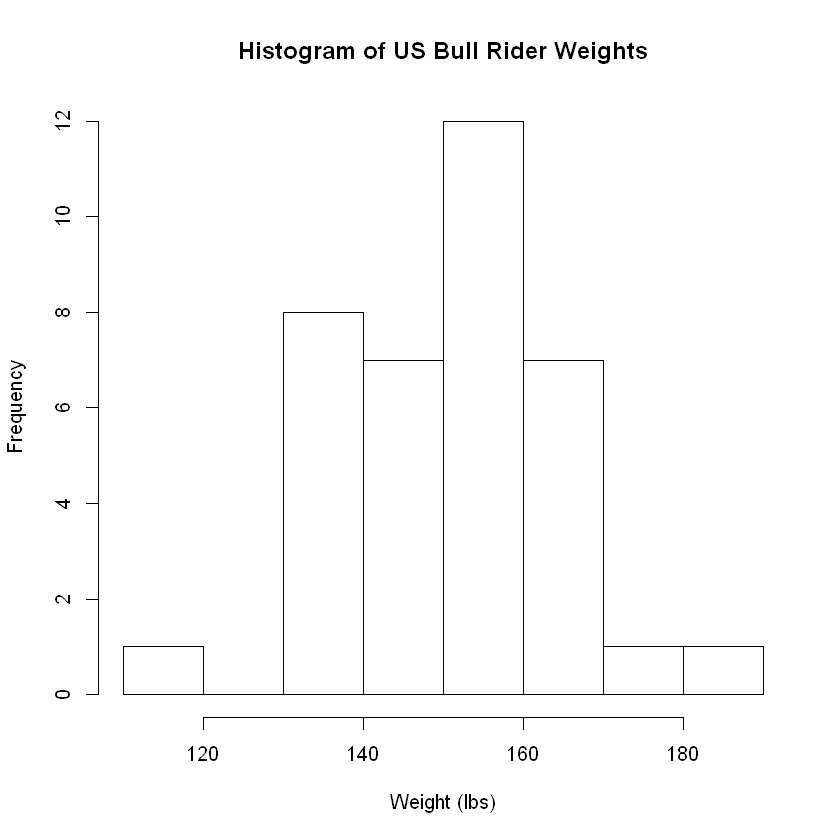

In [7]:
# Visualize the weight distribution
hist(USA$Weight, main='Histogram of US Bull Rider Weights',xlab='Weight (lbs)')

In [12]:
# Run the single sample t-test two tailed
t.test(USA$Weight, mu=190)


	One Sample t-test

data:  USA$Weight
t = -17.2314, df = 36, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 190
95 percent confidence interval:
 148.7660 157.4502
sample estimates:
mean of x 
 153.1081 


In [10]:
# Run the single sample t-test one tailed greater
t.test(USA$Weight, mu=190, alternative="greater")


	One Sample t-test

data:  USA$Weight
t = -17.2314, df = 36, p-value = 1
alternative hypothesis: true mean is greater than 190
95 percent confidence interval:
 149.4935      Inf
sample estimates:
mean of x 
 153.1081 


In [11]:
# Run the single sample t-test one tailed less
t.test(USA$Weight, mu=190, alternative="less")


	One Sample t-test

data:  USA$Weight
t = -17.2314, df = 36, p-value < 2.2e-16
alternative hypothesis: true mean is less than 190
95 percent confidence interval:
     -Inf 156.7227
sample estimates:
mean of x 
 153.1081 


## Primary Research Question

Do professional bull riders stay on their bulls 50% of the time? Test the hypothesis that the mean ride percentage is 0.500 in 2014, using riders with at least 5 events in 2014. 

In [32]:
#Select the riders that participated in at least 5 events in 2014.
rides <-bull[bull$Events14 >=5,]

In [33]:
#Calculate the sample mean and standard deviation of ride percentage in 2014.
mean(rides$RidePer14)
sd(rides$RidePer14)

[1] 0.3346643

[1] 0.1065763

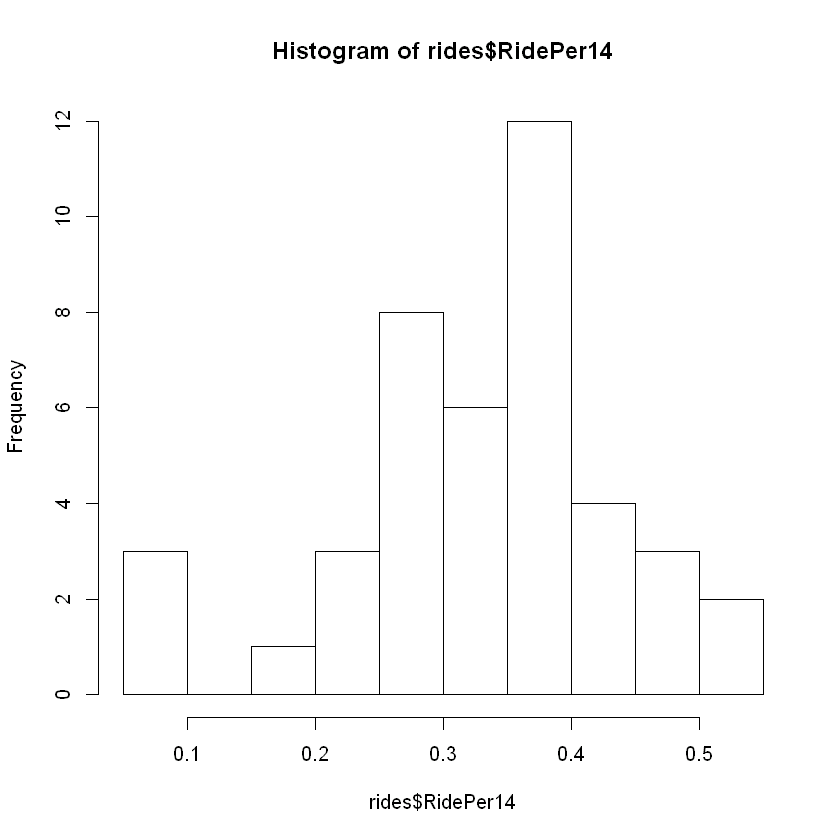

In [34]:
#Generate a histogram to look at the distribution of the ride percentage in 2014.
hist(rides$RidePer14)

In [ ]:
#Confirm the assumptions of a one-sample t-test.


In [36]:
#Run the t-test and interpret the results.
t.test(rides$RidePer14, mu=.5)


	One Sample t-test

data:  rides$RidePer14
t = -10.0538, df = 41, p-value = 1.253e-12
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3014528 0.3678758
sample estimates:
mean of x 
0.3346643 
